In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

# Over sampling techniques
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Undersampling techniques
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Under- and Oversampling can be combined
from imblearn.combine import SMOTETomek, SMOTEENN


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 

In [3]:
# Class sizes of Class 1 and class 2
n_1 = 100 # size of class 1
n_0 = 20 # size of class 2

In [5]:
[1] * 2

[1, 1]

In [6]:
# Create the y values
y = [1] * n_1 + [0] * n_0

In [8]:
# np.random.uniform() gives us a random number betweent 0 and 1
np.random.uniform(size=n_1)

array([0.57202672, 0.70662363, 0.7690183 , 0.80902628, 0.80216213,
       0.88631008, 0.99133589, 0.61573777, 0.84579008, 0.6596374 ,
       0.65826683, 0.72453406, 0.33905495, 0.33139835, 0.36472453,
       0.13045427, 0.344055  , 0.8274467 , 0.10864829, 0.18835679,
       0.73055462, 0.90367525, 0.35024469, 0.40098702, 0.37445251,
       0.61164182, 0.89118748, 0.24848619, 0.66899617, 0.96897945,
       0.4747457 , 0.85036135, 0.57895255, 0.27295504, 0.03167146,
       0.26567797, 0.34025064, 0.96749142, 0.16532595, 0.89937988,
       0.64505897, 0.53828418, 0.61430188, 0.96005375, 0.83483147,
       0.22173315, 0.0203575 , 0.2451883 , 0.9237104 , 0.56660715,
       0.60267836, 0.54715743, 0.43555081, 0.33321845, 0.91931586,
       0.34315695, 0.21077459, 0.67053392, 0.15045223, 0.53602471,
       0.1756424 , 0.90923471, 0.76055379, 0.46629071, 0.12403049,
       0.48248931, 0.82943982, 0.81084564, 0.59087911, 0.66324665,
       0.75100708, 0.25471842, 0.55088794, 0.51803602, 0.88699

In [18]:
# Create X values (x1 and x2)
# x = values for the class 1 + values for the class 0
x1 = list(np.random.uniform(size=n_1)*10) + list(np.random.uniform(low=.7, size=n_0)*10)
x2 = list(np.random.uniform(size=n_1)*10) + list(np.random.uniform(low=.7, size=n_0)*10)

In [19]:
# Create a DataFrame out of the data
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.head()

,x1,x2,y
0,6.175858,9.767289,1
1,1.447356,6.036872,1
2,8.664869,8.947512,1
3,9.385981,2.142039,1
4,8.222623,1.044289,1


In [39]:
# Create a function that takes over plotting for us
def plot_data(df):
    '''
    The function plot_data plots the plot.
    '''
    sns.scatterplot(x='x1', y='x2', data=df, hue='y',  alpha=0.5)
    plt.title('Plot datapoints in 2 dimensions', fontsize=15)
    plt.xlabel('x1-values', fontsize=12)
    plt.ylabel('x2-values', fontsize=12)
    plt.axis(xmin=-1, xmax=11, ymin=-1, ymax=11)
    plt.show()

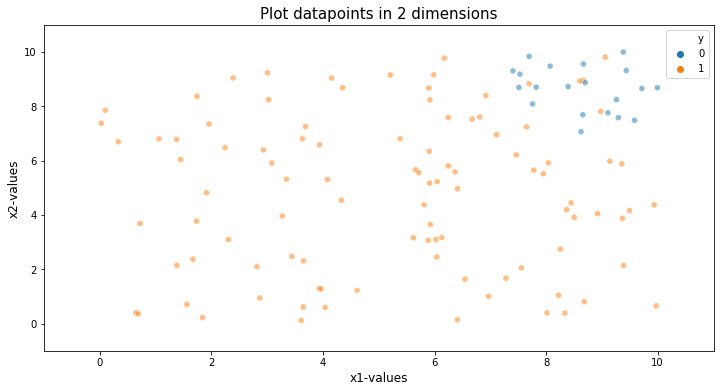

In [40]:
plot_data(df)

## Random oversampling

In [22]:
#!pip install imblearn

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
X = df[['x1', 'x2']]
X.head()

,x1,x2
0,6.175858,9.767289
1,1.447356,6.036872
2,8.664869,8.947512
3,9.385981,2.142039
4,8.222623,1.044289


In [30]:
# Create an Oversampler and fit_resample X and y
ros = RandomOverSampler(sampling_strategy={0: 50}) # sampling_strategy = {class: number_of_datapoints_after_resampling}

In [31]:
X_resample, y_resample = ros.fit_resample(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# Inspect the shape of the resampled data
X.shape, X_resample.shape

((120, 2), (150, 2))

In [33]:
# Create a resampled Dataset
def create_resampled_dataset(X_resample, y_resample):
    '''Creates a resampled DataFrame from X_resample and y_resample'''
    X_resample = pd.DataFrame(X_resample, columns=['x1', 'x2'])
    df_resample = pd.concat([X_resample, pd.DataFrame(y_resample, columns=['y'])], axis=1)
    return df_resample

In [34]:
# Create the resampled DataFrame from RandomOversampling
ros_resample = create_resampled_dataset(X_resample, y_resample)
ros_resample.head()

,x1,x2,y
0,6.175858,9.767289,1
1,1.447356,6.036872,1
2,8.664869,8.947512,1
3,9.385981,2.142039,1
4,8.222623,1.044289,1


In [36]:
ros_resample.shape

(150, 3)

In [ ]:
# Look at duplicates

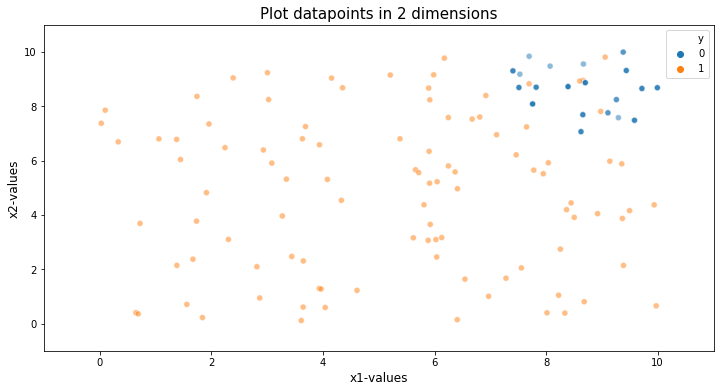

In [41]:
plot_data(ros_resample)

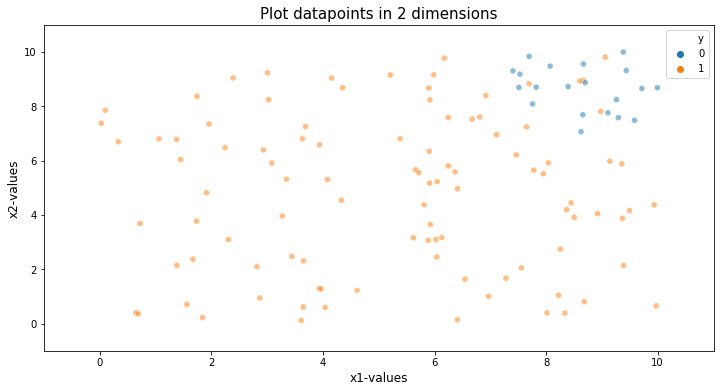

In [42]:
plot_data(df)

It looks like there is no difference betweent our two DataFrames. The reason is that RandomOverSampling copies the original data points and therefore we do not see any new data points in visual inspection.

## SMOTE - Synthetic Minority Oversampling Technique

What it basically does, it creates datapoints that lie between two (or more) original datapoints from the minority class.

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy={0: 50})
X_resampled, y_resampled = smote.fit_resample(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
smote = create_resampled_dataset(X_resampled, y_resampled)

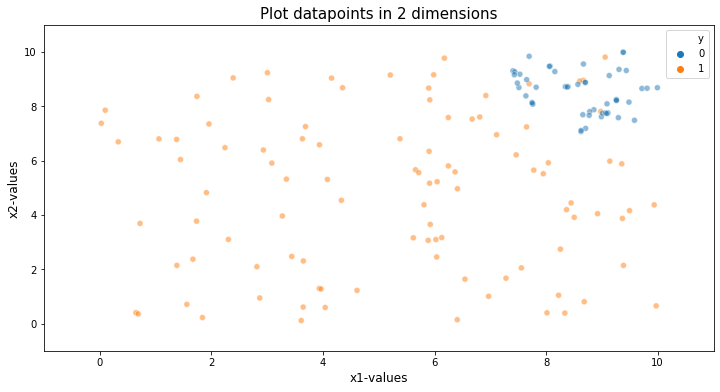

In [46]:
plot_data(smote)

## Random Undersampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [49]:
rus = RandomUnderSampler(sampling_strategy={1: 50})
X_resample, y_resample = rus.fit_resample(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
rus_df = create_resampled_dataset(X_resample, y_resample)

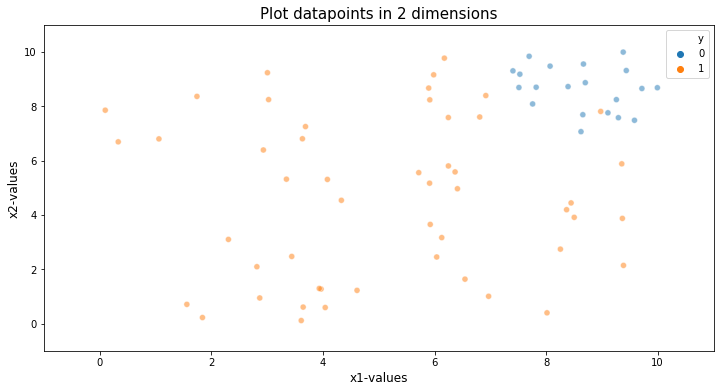

In [51]:
plot_data(rus_df)

## Near Miss

In [52]:
from imblearn.under_sampling import NearMiss

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


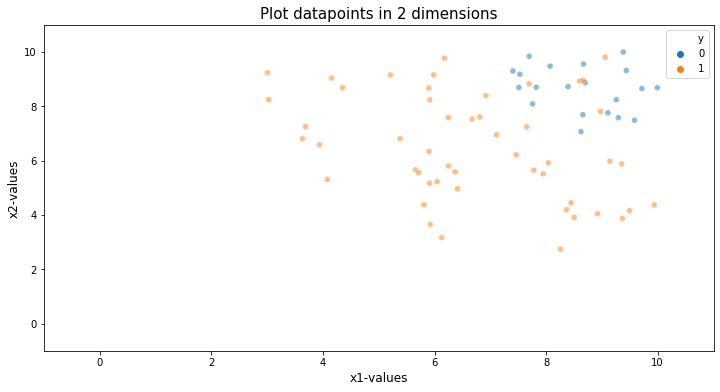

In [53]:
nm = NearMiss(sampling_strategy={1: 50})
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
nm_df = create_resampled_dataset(X_resampled_nm, y_resampled_nm)
plot_data(nm_df)